# Discrete solitons, twin soliton, compute entanglement vs N

We use a variational ansatz via pullback in the representation
of the characteristic function in the quantum phase space


<img src="../logo_circular.png" width="20" height="20" />@by claudio<br>
<br>nonlinearxwaves@gmail.com<br>
@created 31 july 2021<br>
@version 30 march 2023

## Disable GPU

In [1]:
import os


In [2]:
DisableGPU=True
if DisableGPU:
    try:
        # Disable all GPUS        
        os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
        #tf.config.set_visible_devices([], 'GPU')
        #visible_devices = tf.config.get_visible_devices()
        #for device in visible_devices:
        #    assert device.device_type != 'GPU'
    except:
        # Invalid device or cannot modify virtual devices once initialized.
        pass
else:
    print("Nothing to be done")

## Import and setup

In [4]:
import sys
sys.path.append('../../')
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from thqml import phasespace as qx
from thqml import quantumsolitons as qs
import random

2023-03-29 08:33:41.906423: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-29 08:33:41.906443: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-29 08:33:41.906459: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (x1): /proc/driver/nvidia/version does not exist
2023-03-29 08:33:41.906831: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Default precision (tr_real and np_real as tf.float32 np.float32 or tf.float64 np.floatt)

In [5]:
tf_real = tf.float32
np_real = np.float32

In [6]:
np.set_printoptions(precision=4)

#### Check GPU

In [7]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


# Parameters

In [8]:
max_number_epochs=10000

In [9]:
period_display_epoch=max_number_epochs/10

In [10]:
period_checkpoint_epoch=period_display_epoch

In [11]:
BosonSampling=False

In [12]:
# index of pair modes
nA=4
nB=5

## Target total number of bosons

In [14]:
Nmin=20 # minimal value of N
Nmax=110 # maximal value of N
Nstep=10 # step in N

## Dimension (initial minimal value)

In [16]:
N=20

### Number of modes

In [17]:
n=int(N/2)

## Value for potential

In [18]:
chi=-1

# Init the quantum soliton python module

In [20]:
# bose hubbard model has L=n and U=chi
qs.init({"n":n,"dtype":tf_real,"chi":chi,"L":n,"model":"nnt"})

Setting Bose-Hubbard model L=n (non periodical)


## Compute negativity by training for various N

In [ ]:
ENeg_list=[]
N_values=[]
for indexn in range(Nmin,Nmax,Nstep):
    tf.keras.backend.clear_session()
    print('----------------------- Processing N = '+repr(indexn))
    ENeg, twin_model = qs.twin_solitons_entanglement(nA,nB,indexn,nepochs=max_number_epochs)
    print('EN = '+repr(ENeg))
    ENeg_list.append(ENeg)
    N_values.append(indexn)


----------------------- Processing N = 20
Training model for epochs 10000 ...
Initial loss 396.8519287109375
  Final loss 0.004855906590819359
Number of total bosons after training 20.0006 ...
 ################################### 
EN = 1.9248179455760157
----------------------- Processing N = 30
Training model for epochs 10000 ...


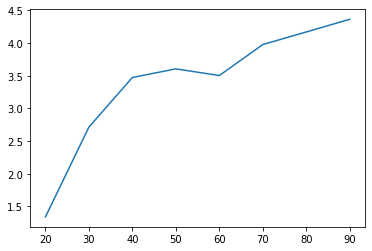

In [18]:
#plt.plot(N_values,ENeg_list)

## Save data 

In [26]:
root_path='./'
claudio_arrays_file=root_path+'dataBHT/manyN/data_Nmin'+repr(Nmin)+'_Nmax'+repr(Nmax)+'_Nstep'+repr(Nstep)+'_N'+repr(N)+'_A'+repr(nA)+'_B'+repr(nB)+'_epochs'+repr(max_number_epochs)+'/claudioarrays'
claudio_weights_file=root_path+'dataBHT/manyN/data_Nmin'+repr(Nmin)+'_Nmax'+repr(Nmax)+'_Nstep'+repr(Nstep)+'_N'+repr(N)+'_A'+repr(nA)+'_B'+repr(nB)+'_epochs'+repr(max_number_epochs)+'/claudiomodel'

In [27]:
claudio_arrays_file

'/home/claudio/Dropbox/incorso/QUOMPLEX2018/QUOMPLEX2020PYTHON/QUOMPLEX2020/examples/variational/dataBHT/manyN/data_Nmin20_Nmax100_Nstep10_N20_A4_B5_epochs10000/claudioarrays'

In [28]:
# Save file
twin_model.save_weights(claudio_weights_file)
np.savez(claudio_arrays_file,ENeg_list=ENeg_list,N_values=N_values,
         nA=nA, nB=nB,Nmin=Nmin,Nmax=Nmax,Nstep=Nstep, chi=chi, N=N, max_number_epochs=max_number_epochs)

In [29]:
def plot_nboson(twin_model):
    " Plot the boson profile in the model"
    xtrain = np.random.rand(1, N)-0.5
    results=twin_model(xtrain)
    plt.stem(results[0][0].numpy());


In [23]:
#ENeg, twin_model = qs.twin_solitons_entanglement(nA,nB,indexn,nepochs=max_number_epochs)

#plot_nboson(twin_model)

## Stop Exec

In [24]:
    raise Exception("Finished code")

Exception: Finished code

## Create model

In [ ]:
model, output_tensors, _ = qs.soliton_model()

In [ ]:
Htotal=output_tensors[2]

In [ ]:
Ntotal=output_tensors[5]

In [ ]:
    nboson=output_tensors[0]

## Define losses

In [ ]:
expL=tf.exp(Htotal/n)
nAtf=tf.gather_nd(nboson,[[0,nA]])[0]
nBtf=tf.gather_nd(nboson,[[0,nB]])[0]
expN=tf.exp(-nAtf)
expDN=tf.square(nAtf-nBtf)
Nexp_tf=tf.constant(Nexp,dtype=tf_real)

## Add loss to the model

In [ ]:
model.add_loss(tf.reduce_mean(tf.square(Ntotal-Nexp_tf)))
model.add_loss(expL)
model.add_loss(expN)
model.add_loss(expDN)
model.compile(optimizer='adam')

## Train

In [ ]:
results=model.evaluate(xtrain,ytrain)

In [ ]:
%%time
print("Training model for epochs "+repr(max_number_epochs)+" ...")

#history=model.fit(xtrain,ytrain,epochs=max_number_epochs,verbose=0, callbacks=[CustomCallback()])    
history=model.fit(xtrain,ytrain,epochs=max_number_epochs,verbose=0)    
print("Initial loss "+repr(history.history['loss'][0]))
print("  Final loss "+repr(history.history['loss'][-1]))
print(" ################################### ")
results=model.evaluate(xtrain,ytrain)

## Compute final entropy 

In [ ]:
cov_out=model(xtrain)[6]

In [ ]:
# mask for negativity (entropy)
nmask=np.zeros(n)
nmask[nA]=1
print(nmask)

In [ ]:
ENeg, Neg, seigs, ev, sv=qs.logarithmic_negativity(cov_out.numpy(),nmask)

In [ ]:
ENeg

## Stop execution

In [ ]:
raise Exception("Finished code")

## Callbacks

In [ ]:
# checkpoint function
def savecheckpoint(num_epochs):
    model.save_weights(claudio_weights_file+'_cp_'+repr(num_epochs))
    np.savez(claudio_arrays_file+'_cp_'+repr(num_epochs),history_H=history_H,history_N=history_N,history_beta=history_beta,
             history_eig=history_eig,history_negativity=history_negativity,nbosonout=nbosonout[0].numpy())
    print('Made checkpoint at total epoch '+repr(num_epochs))

In [ ]:
eig_model = tf.keras.Model(inputs = xin, outputs=e)    # print model
cov_model = tf.keras.Model(inputs = xin, outputs=cov)    # for covariance matrix
history_eig=[]
history_H=[]
history_N=[]
history_expN=[]
history_expDIFF=[]
history_beta=[]
history_negativity=[]
# mask for negativity (entropy)
nmask=np.zeros(n)
nmask[nA]=1
# custom callback
class CustomCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        global history_eig
        #keys = list(logs.keys())
        eigs=eig_model(xtrain)
        history_eig.append(eigs.numpy()[-1])
        history_H.append(logs.get("H"))
        history_N.append(logs.get("N"))
        history_expN.append(logs.get("expN"))
        history_expDIFF.append(logs.get("expDIFF"))
        history_beta.append(LL.get_weights()[0])
        ENeg, _, _,_,_= qs.logarithmic_negativity(cov_model(xtrain).numpy(),nmask)
        history_negativity.append(ENeg)
        
        if np.mod(epoch, period_display_epoch)==0:
            print("Epoch "+repr(epoch)+
                  " of "+repr(max_number_epochs)+
                 " time "+repr(np.datetime64('now'))+
                  " H="+repr(np.around(logs.get("H"),decimals=3))+
                  " N="+repr(np.around(logs.get("N"),decimals=3))+
                  " DN="+repr(np.around(logs.get("expDIFF"),decimals=3)))
            
        # checkpoint at absolute value of the number of epochs
        if np.mod(epoch, period_checkpoint_epoch)==0:
            savecheckpoint(len(history_N)-1)

## Losses and metrics

In [ ]:
model = tf.keras.Model(inputs = xin, outputs=expL)    # print model
model.add_loss(tf.reduce_mean(tf.square(Ntotal-Nexp_tf)))
model.add_loss(expL)
model.add_loss(expN)
model.add_loss(expDN)
#model.add_loss(expDIFF)
model.add_metric(tf.reduce_mean(tf.square(Ntotal-Nexp_tf)),name="Dn",aggregation="mean")
model.add_metric(expL,name="expDIFF",aggregation="mean")
model.add_metric(expL,name="expF",aggregation="mean")
model.add_metric(expDN,name="expDN",aggregation="mean")
model.add_metric(Htotal,name="H",aggregation="mean")
model.add_metric(Ntotal,name="N",aggregation="mean")
model.compile(optimizer='adam')

## Load saved

In [ ]:
# load data
load_data=True
if load_data:
    try:
        model.load_weights(claudio_weights_file)
        data_arrays=np.load(claudio_arrays_file+'.npz')
        data_arrays.files
        history_H=data_arrays['history_H'].tolist()
        history_N=data_arrays['history_N'].tolist()
#        history_expN=data_arrays['history_expN'].tolist()
        history_beta=data_arrays['history_beta'].tolist()
        history_eig=data_arrays['history_eig'].tolist()
        history_negativity=data_arrays['history_negativity'].tolist()
        print("Loaded data")
        plt.figure(1)
        plt.plot(history_H)
        plt.title('H')
        plt.figure(2)
        plt.plot(history_N)
        plt.title('N, expN')
        plt.plot(history_expN)
        plt.figure(3)
        plt.plot(np.real(history_beta))
        plt.title('beta')
        plt.figure(4)
        plt.plot(np.real(history_eig))
        plt.title('eig')
        plt.figure(5)
        plt.plot(np.real(history_negativity))
        plt.title('log negativity')
    except: 
        print("No stored data found")

## Test

In [ ]:
#model(xtrain)
#model.evaluate(xtrain)

In [ ]:
# display obserbables
Bmodel = tf.keras.Model(inputs = xin, outputs=[nboson,Htotal,Vtotal, Ktotal, Ntotal,d])    # print model
nbosonout, Hout, Vout, Kout, Nout,dout=Bmodel(xtrain) 
print(nbosonout)
print(tf.math.reduce_sum(nbosonout))
print("H="+repr(Hout.numpy()))
print("K="+repr(Kout.numpy()))
print("V="+repr(Vout.numpy()))
print("N="+repr(Nout.numpy()))
plt.plot(nbosonout[0])

## Train

In [ ]:
total_trainable_parameters=np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_variables])
print("Model trainable weights "+repr(total_trainable_parameters))

In [ ]:
%%time
# train
# timing after the first run of training that takes around a duobled time
# N=32 100 epochs in 5.3 s in portatilegrande with noGPU
# N=32 100 epochs in 11.7 s in portatilegrande with GPU
# N=32 hawaii 1000 epocs 2 minuti no gpu
# N=32 hawaii 10000 epocs 20 minuti no gpu
# N=32 hawaii 10000 epocs 43 minuti with gpu

print("Training model for epochs "+repr(max_number_epochs)+" ...")

history=model.fit(xtrain,ytrain,epochs=max_number_epochs,verbose=0, callbacks=[CustomCallback()])    
print("Initial loss "+repr(history.history['loss'][0]))
print("  Final loss "+repr(history.history['loss'][-1]))
print(" ################################### ")
results=model.evaluate(xtrain,ytrain)

In [ ]:
# save model and arrays
model.save_weights(claudio_weights_file)
np.savez(claudio_arrays_file,history_H=history_H,history_N=history_N,history_beta=history_beta,
         history_eig=history_eig,history_negativity=history_negativity)
max_number_epochs

In [ ]:
plt.figure(1)
#plt.plot(history.history["H"])
plt.plot(history_H)
plt.title("H")
fig, axs=plt.subplots(2)
#plt.figure(2)
#plt.plot(history.history["N"])
#plt.plot(history_N)
axs[0].plot(history_expN)
axs[1].plot(history_N)
plt.title("expN")
plt.figure(3)
plt.plot(np.real(history_expDIFF))
plt.title("expDIFF")
plt.figure(4)
plt.plot(history_beta)
plt.title("beta")
plt.figure(5)
plt.plot(history_negativity)
plt.title("logarithmic negativity")

In [ ]:
Bmodel = tf.keras.Model(inputs = xin, outputs=[nboson,nboson2,Htotal,Vtotal, Ktotal, Ntotal,Ltotal, cov, d])    # print model
nbosonout,nbosonout2, Hout, Vout, Kout, Nout,Lout,covout, dout=Bmodel(xtrain) 
print(nbosonout)
print(tf.math.reduce_sum(nbosonout))
print("H="+repr(Hout.numpy()))
print("K="+repr(Kout.numpy()))
print("V="+repr(Vout.numpy()))
print("N="+repr(Nout.numpy()))
print("F="+repr(Lout.numpy()))
print("beta="+repr(LL.get_weights()[0]))
print("orderparameter="+repr(np.mean(dout.numpy())))

plt.figure(6)
plt.stem(nbosonout[0])
plt.title('<n>')
plt.figure(7)
tmpr=dout[0][0::2].numpy()
tmpi=dout[0][1::2].numpy()
a2=0.5*(tmpr**2+tmpi**2)
fase=np.angle(tmpr+1j*tmpi)
plt.stem(a2)
plt.title('|<dout>|^2')
plt.figure(8)
plt.plot(fase)
plt.title('phase')
plt.figure(10)
plt.plot(nbosonout[0])
plt.title('<n>')
plt.figure(11)
plt.plot(nbosonout2[0]-nbosonout[0]**2)
plt.title('<Dn>')

# Compute the partial transpose and the degree of entanglement on the peaks

In [ ]:
# covariance matrix
cov_np=covout.numpy()
# take a vector of n elements, with 1 for each mode to be trasponsed
nmask=np.zeros(n)
nmask[nA]=1
# build a diagonal with -1 corresponding to the momenta to be transposed
diag1=np.ones(N, dtype=np_real)
for j in range(n):
    if nmask[j]==1:
        diag1[j+1]=-1
# build the transformation matrix
Ftrans=np.diag(diag1)
# transform the covariance matrix
cov_np_Ta=np.matmul(Ftrans, np.matmul(cov_np, Ftrans))
qs.entanglement_entropy(cov_np_Ta)


In [ ]:
nmask.shape

In [ ]:
# determinant of covariance matrix
np.linalg.det(cov_np)

In [ ]:
nmask=np.zeros(n)
nmask[nA]=1
nmask[nB]=0
print(nmask)

In [ ]:
ENeg, Neg, seigs, ev, sv=qs.logarithmic_negativity(cov_np,nmask)


In [ ]:
print(ENeg)
print(Neg)
print(seigs)
print(ev)


In [ ]:
sv.shape

In [ ]:
for i in range(n):
    svr=np.real(sv[i,0::2])
    plt.figure()
    asv=svr
    plt.plot(asv)
    plt.title(repr(i)+" e="+repr(seigs[i]))

In [ ]:
sv[9]

3**2

# Boson sampling the model

In [ ]:
if not(BosonSampling):
    raise Exception("Finished code")

## Make the Q-trasform of the model

In [ ]:
kin, Qrho=qx.getQTransformModel(PSImodel)
Qfun = qx.QTransform(covout,dout)

In [ ]:
Qrho.summary()

In [ ]:
#qx.Pr([1]*n, Qrho)

In [ ]:
[0]*n

In [ ]:
Qfun

In [ ]:
qx.Pr([0]*n, Qfun)

In [ ]:
nsample=[0]*n

In [ ]:
nsample[1]=1

In [ ]:
print(nsample)

In [ ]:
qx.Pr(nsample, Qfun)

In [ ]:
nsample[0]=1

In [ ]:
qx.Pr(nsample, Qfun)

In [ ]:
nsample

In [ ]:
nsample[2]=1

In [ ]:
qx.Pr(nsample, Qfun)

In [ ]:
nsample[3]=1; print(nsample)

In [ ]:
qx.Pr(nsample, Qfun)

In [ ]:
nsample[4]=1; print(nsample)

In [ ]:
%%time
qx.Pr(nsample, Qfun)

In [ ]:
nsample=[0]*n; nsample[9]=1;nsample[7]=1;nsample[8]=1; print(nsample)

In [ ]:
%%time
qx.Pr(nsample, Qfun)

In [ ]:
%%time
nphoton=4
out=[0]*n
for ij in range(n):
    nsample=[0]*n
    nsample[ij]=nphoton
    out[ij]=qx.Pr(nsample, Qfun)
plt.plot(out)

In [ ]:
%%time
nphoton=1
out=[0]*n
for ij in range(n):
    nsample=[0]*n
    nsample[ij]=nphoton
    nsample[np.mod(ij+1,n)]=nphoton
    print(nsample)
    out[ij]=qx.Pr(nsample, Qfun)
plt.plot(out)

In [ ]:
%matplotlib inline
plt.plot(dout[0])
print(np.argmax(dout[0]))

In [ ]:
# probability of 2 photons
%matplotlib inline
%time
#ijcenter =np.argmax(dout[0])/2
ijcenter=nA
print("Center at j = "+repr(ijcenter))
out=np.zeros(n)
# sul solitone 2 fotoni
c=0
for ij in range(n):
    nsample=[0]*n
    nsample[ijcenter]=1
    if np.not_equal(ij,ijcenter):
        nsample[ij]=1
    else: #count 2 photon on the soliton peak
        nsample[ij]=2    
    print(nsample)
    out[c]=qx.Pr(nsample, Qfun)
    c=c+1
        
plt.stem(out)
%time

# PLOT MODEL

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
tf.keras.utils.plot_model(Qfun)

In [ ]:
M,_ =model.layers[1].get_M()

In [ ]:
tf.print(M)